In [27]:
import meop_process
from pathlib import Path
import sys
import os
import shutil
import numpy as np
import pandas as pd
import xarray as xr

# Process tag

In [28]:
meop_process.start_matlab()

matlab started
cd /media/disk2/roquet/MEOP_process;

PWD: /media/disk2/roquet/MEOP_process


In [29]:
meop_process.run_command('cd /media/disk2/roquet/MEOP_process')
meop_process.run_command('disp(config_id);');
conf = meop_process.init_mirounga()

cd /media/disk2/roquet/MEOP_process

disp(config_id);
jupyter_froqu_pc207_linux

conf = init_mirounga;



In [30]:
deployment='sk3'

In [48]:
meop_process.process_tags(deployment=deployment)

Process deployment :sk3

conf = init_mirounga;

remove_deployment(conf,EXP,one_smru_name);

create_ncargo(conf,EXP,one_smru_name);
Process EXP=sk3
	1 tags
	72 profiles
  sk3-13219-15: 4 profiles and 4 Sprofiles removed

create_fr0(conf,EXP,one_smru_name);

update_metadata(conf,EXP,one_smru_name);

apply_adjustments(conf,EXP,one_smru_name);

apply_tlc(conf,EXP,one_smru_name);

apply_tlc_fr(conf,EXP,one_smru_name);



True

In [49]:
meop_process.generate_calibration_plots(deployment=deployment)

conf = init_mirounga;

generate_plot1(conf,EXP,one_smru_name);
calibration plots: 



True

In [31]:
meop_process.create_hr2(deployment=deployment)

Process deployment :sk3

conf = init_mirounga;

create_hr2(conf,EXP,one_smru_name);
Create hr2 version [by default, hr1 --> hr2]
  sk3-13219-15: hr1 --> hr2



True

In [50]:
meop_process.generate_doc_latex(deployment=deployment)

conf = init_mirounga;

generate_plot2(conf,EXP,one_smru_name);
plot diag sk3: lr0, raw
plot diag sk3: lr1, adj
plot diag sk3: hr1, adj



True

In [7]:
meop_process.export_odv4(deployment=deployment)

conf = init_mirounga;

generate_odv4(conf,EXP,one_smru_name);
generate ODV4: sk3-13219-15



True

In [8]:
meop_process.stop_matlab()

# Controlling data

In [9]:
import meop_filenames
import meop
from importlib import reload
reload(meop) 

<module 'meop' from '/media/disk2/roquet/MEOP_process/python/meop.py'>

In [10]:
smru_name = 'sk3-13219-15'
file_name = meop_filenames.fname_prof(smru_name,qf='lr0')

In [23]:
file_name.name.split('_')[0]

'sk3-13219-15'

In [12]:
dir(meop_filenames)

['Path',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'copy_file',
 'datadir',
 'deployment_from_smru_name',
 'fname_plots',
 'fname_prof',
 'fname_traj',
 'inputdir',
 'list_fname_plots',
 'list_fname_prof',
 'list_smru_name',
 'matlabdir',
 'os',
 'processdir',
 'publicdir',
 'publicdir_CTD',
 'refdir',
 'shutil',
 'version']

In [26]:
ds = meop.open_dataset(file_name)
ds.list_metadata().to_csv(file_name.parent / f'{smru_name}_header.csv')

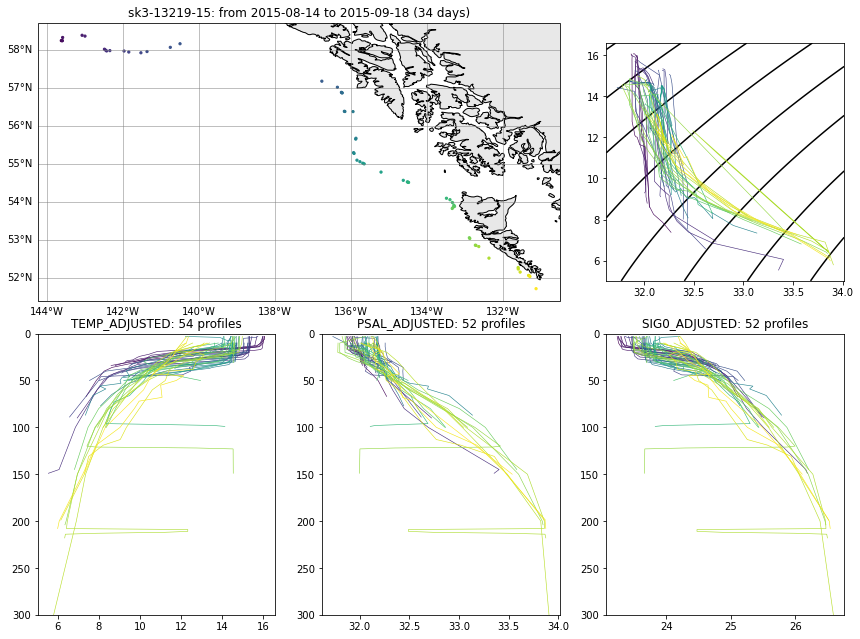

In [14]:
with meop.open_dataset(meop_filenames.fname_prof(smru_name,qf='lr0')) as ds:
    ds.plot_data_tags(pmax=300)

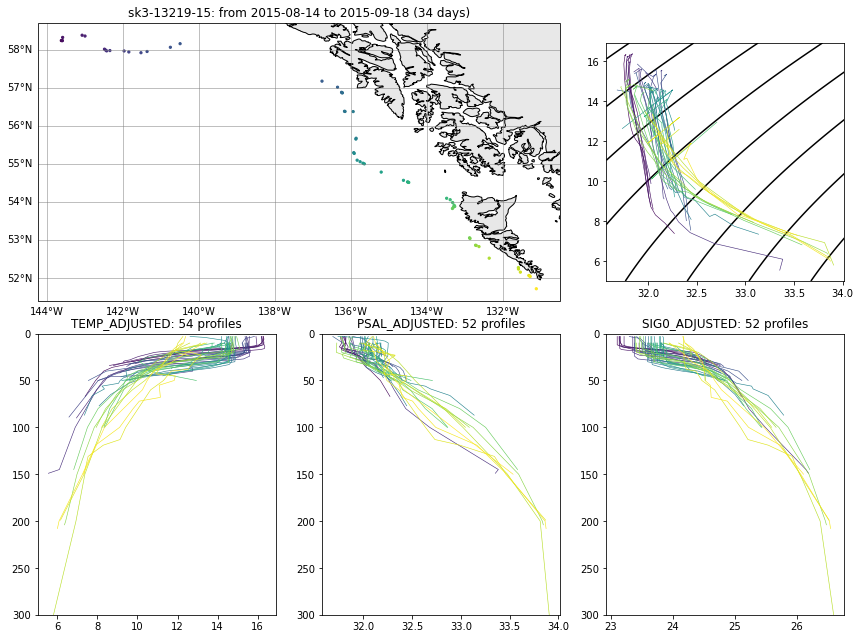

In [15]:
with meop.open_dataset(meop_filenames.fname_prof(smru_name,qf='lr1')) as ds:
    ds.plot_data_tags(pmax=300)

In [8]:
ds = ds.add_sigma0().add_interp('PRES').add_interp('TEMP').add_interp('PSAL').add_interp('SIG0')
ds

<xarray.Dataset>
Dimensions:                       (N_CALIB: 1, N_INTERP: 1000, N_LEVELS: 16, N_PARAM: 3, N_PROF: 57)
Coordinates:
  * N_CALIB                       (N_CALIB) int64 0
  * N_LEVELS                      (N_LEVELS) int64 0 1 2 3 4 ... 11 12 13 14 15
  * N_PARAM                       (N_PARAM) int64 0 1 2
  * N_PROF                        (N_PROF) int64 0 1 2 3 4 5 ... 52 53 54 55 56
  * N_INTERP                      (N_INTERP) int64 0 1 2 3 4 ... 996 997 998 999
Data variables:
    DATA_TYPE                     object b'Argo profile    '
    FORMAT_VERSION                object b'3.0 '
    HANDBOOK_VERSION              object b'3.0 '
    REFERENCE_DATE_TIME           object b'19500101000000'
    DATE_CREATION                 object b'20220204160509'
    DATE_UPDATE                   object b'20220204160509'
    PLATFORM_NUMBER               (N_PROF) object b'00145018' ... b'00145018'
    PROJECT_NAME                  (N_PROF) object b'                         ...
    PI_NAME                       (N_PROF) object b'                         ...
    STATION_PARAMETERS            (N_PROF, N_PARAM) object b'PRES            ...
    CYCLE_NUMBER                  (N_PROF) float64 1.0 2.0 3.0 ... 56.0 57.0
    DIRECTION                     (N_PROF) object b'A' b'A' b'A' ... b'A' b'A'
    DATA_CENTRE                   (N_PROF) object b'IF' b'IF' ... b'IF' b'IF'
    DC_REFERENCE                  (N_PROF) object b'                         ...
    DATA_STATE_INDICATOR          (N_PROF) object b'    ' b'    ' ... b'    '
    DATA_MODE                     (N_PROF) object b'D' b'D' b'D' ... b'D' b'D'
    INST_REFERENCE                (N_PROF) object b'                         ...
    WMO_INST_TYPE                 (N_PROF) object b'995 ' b'995 ' ... b'995 '
    JULD                          (N_PROF) object 2015-08-14 23:54:59 ... 201...
    JULD_QC                       (N_PROF) object b'1' b'1' b'1' ... b'1' b'1'
    JULD_LOCATION                 (N_PROF) object 2015-08-14 23:54:59 ... 201...
    LATITUDE                      (N_PROF) float64 58.24 58.24 ... 52.03 51.71
    LONGITUDE                     (N_PROF) float64 -143.6 -143.6 ... -131.1
    POSITION_QC                   (N_PROF) object b'1' b'1' b'1' ... b'1' b'1'
    POSITIONING_SYSTEM            (N_PROF) object b'LS      ' ... b'LS      '
    PROFILE_PRES_QC               (N_PROF) object b'A' b'A' b'A' ... b'A' b'A'
    PROFILE_PSAL_QC               (N_PROF) object b'A' b'A' b'A' ... b'A' b'A'
    PROFILE_TEMP_QC               (N_PROF) object b'A' b'A' b'A' ... b'A' b'A'
    PRES                          (N_PROF, N_LEVELS) float32 3.0 10.0 ... nan
    PRES_QC                       (N_PROF, N_LEVELS) object b'1' b'1' ... b'9'
    PRES_ADJUSTED                 (N_PROF, N_LEVELS) float32 3.0 10.0 ... nan
    PRES_ADJUSTED_QC              (N_PROF, N_LEVELS) object b'1' b'1' ... b'9'
    PRES_ADJUSTED_ERROR           (N_PROF, N_LEVELS) float32 nan nan ... nan nan
    TEMP                          (N_PROF, N_LEVELS) float32 16.046 ... nan
    TEMP_QC                       (N_PROF, N_LEVELS) object b'1' b'1' ... b'9'
    TEMP_ADJUSTED                 (N_PROF, N_LEVELS) float32 16.278238 ... nan
    TEMP_ADJUSTED_QC              (N_PROF, N_LEVELS) object b'1' b'1' ... b'9'
    TEMP_ADJUSTED_ERROR           (N_PROF, N_LEVELS) float32 0.1 0.1 ... nan nan
    PSAL                          (N_PROF, N_LEVELS) float32 31.77 31.78 ... nan
    PSAL_QC                       (N_PROF, N_LEVELS) object b'1' b'1' ... b'9'
    PSAL_ADJUSTED                 (N_PROF, N_LEVELS) float32 31.763763 ... nan
    PSAL_ADJUSTED_QC              (N_PROF, N_LEVELS) object b'1' b'1' ... b'9'
    PSAL_ADJUSTED_ERROR           (N_PROF, N_LEVELS) float32 0.2 0.2 ... nan nan
    PARAMETER                     (N_PROF, N_CALIB, N_PARAM) object b'PRES   ...
    SCIENTIFIC_CALIB_EQUATION     (N_PROF, N_CALIB, N_PARAM) object b'Pc = P ...
    SCIENTIFIC_CALIB_COEFFICIENT  (N_PROF, N_CALIB, N_PARAM) object b'p1= 0.

(<Figure size 720x720 with 6 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f74ff2110d0>,
       dtype=object))

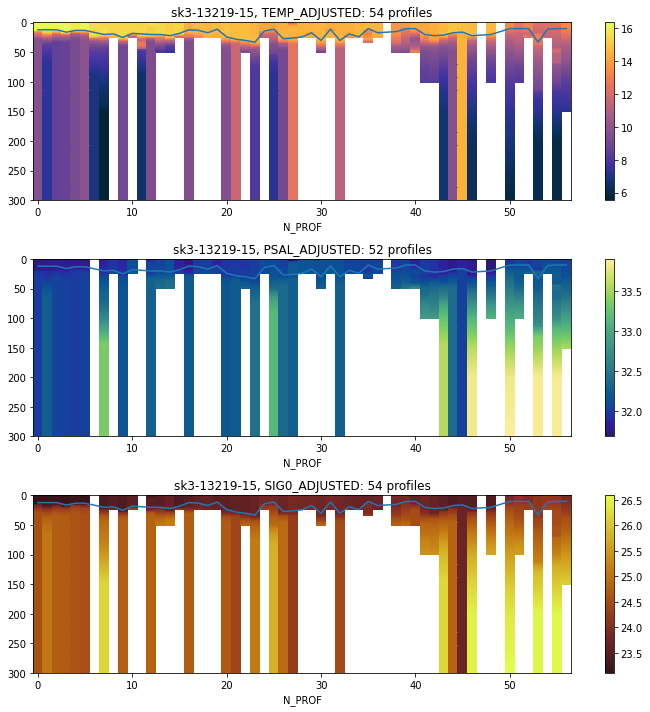

In [9]:
ds.plot_sections(['TEMP','PSAL','SIG0'],rolling=1,density_threshold=0.1,pmax=300)